In [1]:
#import neccessery library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loanPrediction
#Analytic Vidya
#link#https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement#
train=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/Loan_Prediction/train_ctrUa4K.csv")
test=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/Loan_Prediction/test_lAUu6dG.csv")

In [3]:
test['Loan_Status']="test"

In [4]:
test.shape
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,test
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,test
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,test


In [5]:
df_train=pd.concat([train,test],ignore_index=True)
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Missing Values: Check where there are missing values and fix them appropriately
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data

,total,percent
Credit_History,79,0.080530
Self_Employed,55,0.056065
LoanAmount,27,0.027523
Dependents,25,0.025484
Gender,24,0.024465
Loan_Amount_Term,20,0.020387
Married,3,0.003058
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [7]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].dropna().median() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].dropna().mode().values[0] )

In [8]:
#Missing Values: Check where there are missing values and fix them appropriately
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data

,total,percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


In [9]:
#Divide into test and train:
train = df_train.loc[df_train['Loan_Status']!="test"]
test = df_train.loc[df_train['Loan_Status']=="test"]
df_train.shape,test.shape
df_train=train

<AxesSubplot:xlabel='count', ylabel='Gender'>

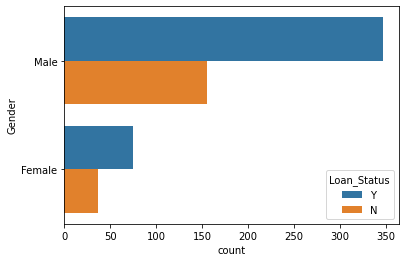

In [10]:
#Power of data Visualization
sns.countplot(y='Gender',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Married'>

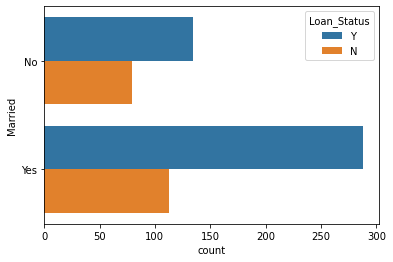

In [11]:
sns.countplot(y='Married',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

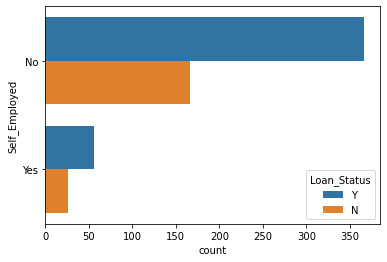

In [12]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

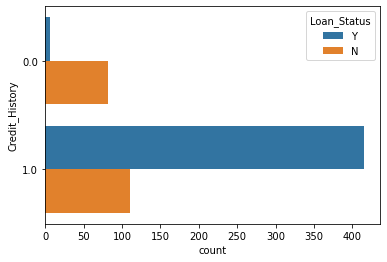

In [13]:
sns.countplot(y='Credit_History',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

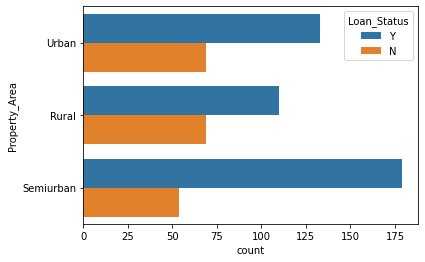

In [14]:
sns.countplot(y='Property_Area',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

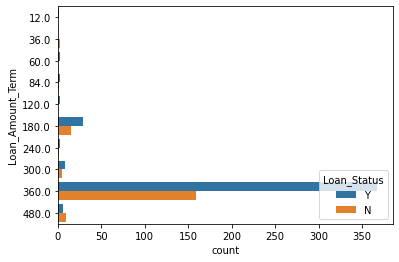

In [15]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df_train)

<AxesSubplot:xlabel='count', ylabel='Education'>

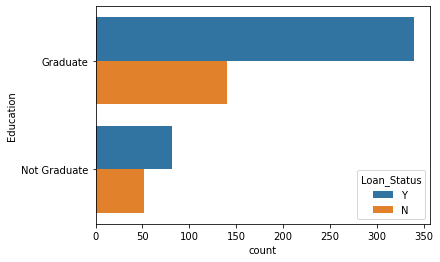

In [16]:
sns.countplot(y='Education',hue='Loan_Status',data=df_train)

In [17]:
var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [18]:
df_train=df_train.drop(columns='Loan_ID')

In [19]:
df_train['Loan_Status']=df_train['Loan_Status'].replace({'Y':1,'N':0})

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in var_mod:
    df_train[i]=le.fit_transform(df_train[i])

<AxesSubplot:>

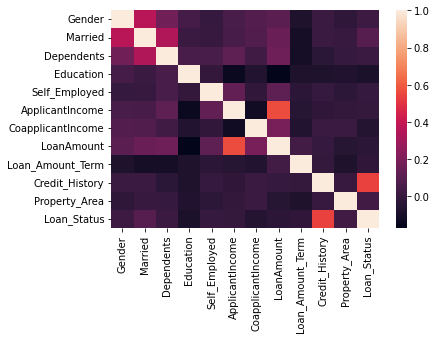

In [21]:
sns.heatmap(df_train.corr())

In [22]:
y = df_train['Loan_Status']
x= df_train.drop('Loan_Status', axis = 1)

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

In [24]:
best_features=SelectKBest(score_func=f_classif,k=5)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

# concatenate dataframes
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(5,'Score'))

        Feature_Name       Score
9     Credit_History  252.652090
1            Married    5.164552
3          Education    4.547685
6  CoapplicantIncome    2.151457
7         LoanAmount    0.661681


In [25]:
new_x=df_train[['Credit_History','Married','Education','CoapplicantIncome','LoanAmount']]

In [26]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(new_x)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=0)

In [43]:
model = LogisticRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_dt = DecisionTreeClassifier().fit(x_train, y_train)
probs_dt = model_dt.predict(x_test)

model_rf = RandomForestClassifier().fit(x_train, y_train)
probs_rf = model_rf.predict(x_test)

In [46]:
accuracy_score(y_test,probs_rf)

0.7560975609756098

In [31]:
Loan_ID=test['Loan_ID']
test=test.drop(columns='Loan_ID')

In [32]:
test=test.drop(columns='Loan_Status')


In [33]:
test.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in var_mod:
    test[i]=le.fit_transform(test[i])

In [ ]:
test.isna().sum()

In [49]:
my_submission = pd.DataFrame({'Loan_ID': Loan_ID, 'Loan_Status':y_pred})
my_submission['Loan_Status']=my_submission['Loan_Status'].replace({1:'Y',0:'N'})
# you could use any filename. We choose submission here
my_submission.to_csv('submissions.csv', index=False)

In [50]:
my_submission

,Loan_ID,Loan_Status
614,LP001015,Y
615,LP001022,N
616,LP001031,N
617,LP001035,N
618,LP001051,N
...,...,...
976,LP002971,N
977,LP002975,N
978,LP002980,N
979,LP002986,N
